## P. Ginsparg (May, 2017; ported to python3 on 25 Aug 2019)

Piecewise linear fit demo (after Kilian W. talk, Apr 2017), fit a function from 1 variable to 1 variable with width N RELU hidden layer

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import ipywidgets as widgets
import numpy as np

In [2]:
def nnfit(x):
      ml = a*x+b
      ml[ml<0] = 0
      return c.dot(ml) 

mycmap = plt.cm.get_cmap('bwr')

C = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

def J(): return sum([(nnfit(x)-y)**2 for x,y in zip(xdata,ydata)])

In [3]:
def onclick(event):
    global line,txt
    ax.plot(event.xdata, event.ydata, 'ob')
    xdata.append(event.xdata)
    ydata.append(event.ydata)
    if len(xdata)>1:
        if line in ax.lines: ax.lines.remove(line)
        if txt: txt.remove()
        sl,intcpt,r = linregress(xdata,ydata)[:3]
        txt = ax.text(2, -1.75, r'$\rho={:.3f}$'.format(r), fontsize=15, color='r')
        line, = ax.plot(xr, sl*xr+intcpt, 'b--')

In [4]:
def nn(sender):
  global a,b,c,M,line,txt,handles,C
  if text.value.isdigit():
    M = int(text.value)
    a = np.random.random(M) - .5
    b = -np.linspace(-5,5,M)*a
    c = np.random.random(M) -.5
    ax.set_title('ReLU [1 {} 1]'.format(M))
    if line and line.get_linestyle() == '-':
        line.set_linestyle('--')
        line.set_alpha(.5)
        line=None
  else: 
    handles=handles[:-1]  
        
  eta=.001
  xc = np.arange(-5,5,.1)
  lastJ = 0
  for _ in range(100000):
    dc = np.zeros(M)
    da = np.zeros(M)
    db = np.zeros(M)
    for x,y in zip(xdata,ydata):
      ml = a*x+b
      ml[ml<0] = 0
      dy= c.dot(ml) - y
      dc += ml*dy
      da += dy*x*c*(ml>0)
      db += dy*c*(ml>0)
    a -= eta*da
    b -= eta*db
    c -= eta*dc
    if _%500 == 0:
      if line in ax.lines: ax.lines.remove(line)
      ba = sorted(np.append(-b/a,[-5.5,5.5]))
      line, = ax.plot(ba, list(map(nnfit,ba)),'o-', color=C[len(handles)%10],
                     markersize=2,label='M={}'.format(M))
      if txt: txt.remove()
      txt = ax.text(3,-1.75,'J={:.3f}'.format(J()),fontsize=15,color='r')

      msl = max(abs(a*c))

      ax1.cla()
      ax1.axis('off')
      d = (1 if len(a)<8 else 0)
      ax1.set_ylim(-1 -d,len(a)+d)
      ax1.set_xlim(-2,2)
      msize = min(20,4*64./len(a))

      for i in (-1,1):
           for j in range(len(a)): ax1.plot([-i,0],[(len(a)-1.)/2,j],'k')
           ax1.plot(-i,(len(a)-1.)/2,'o',color='lightgray',markersize=msize,markeredgecolor='k')
      for i,(x,s,sl) in enumerate(sorted(zip(-b/a,np.sign(a),a*c),key=lambda x: x[0])):
           ax1.plot(0,i,'o',markersize=msize,color= mycmap(-.5*sl/msl + .5),
                                        markeredgecolor='g' if s >0 else 'r')
    
      fig.canvas.draw()

    if _%10000 == 0:
      if lastJ != 0 and J() - lastJ < .001:
        handles.append(line)
        txt.set_color('b')
        ax.legend(handles=handles,bbox_to_anchor=(.85, .88),
           bbox_transform=plt.gcf().transFigure)
            
        break
      lastJ = J()

<IPython.core.display.Javascript object>


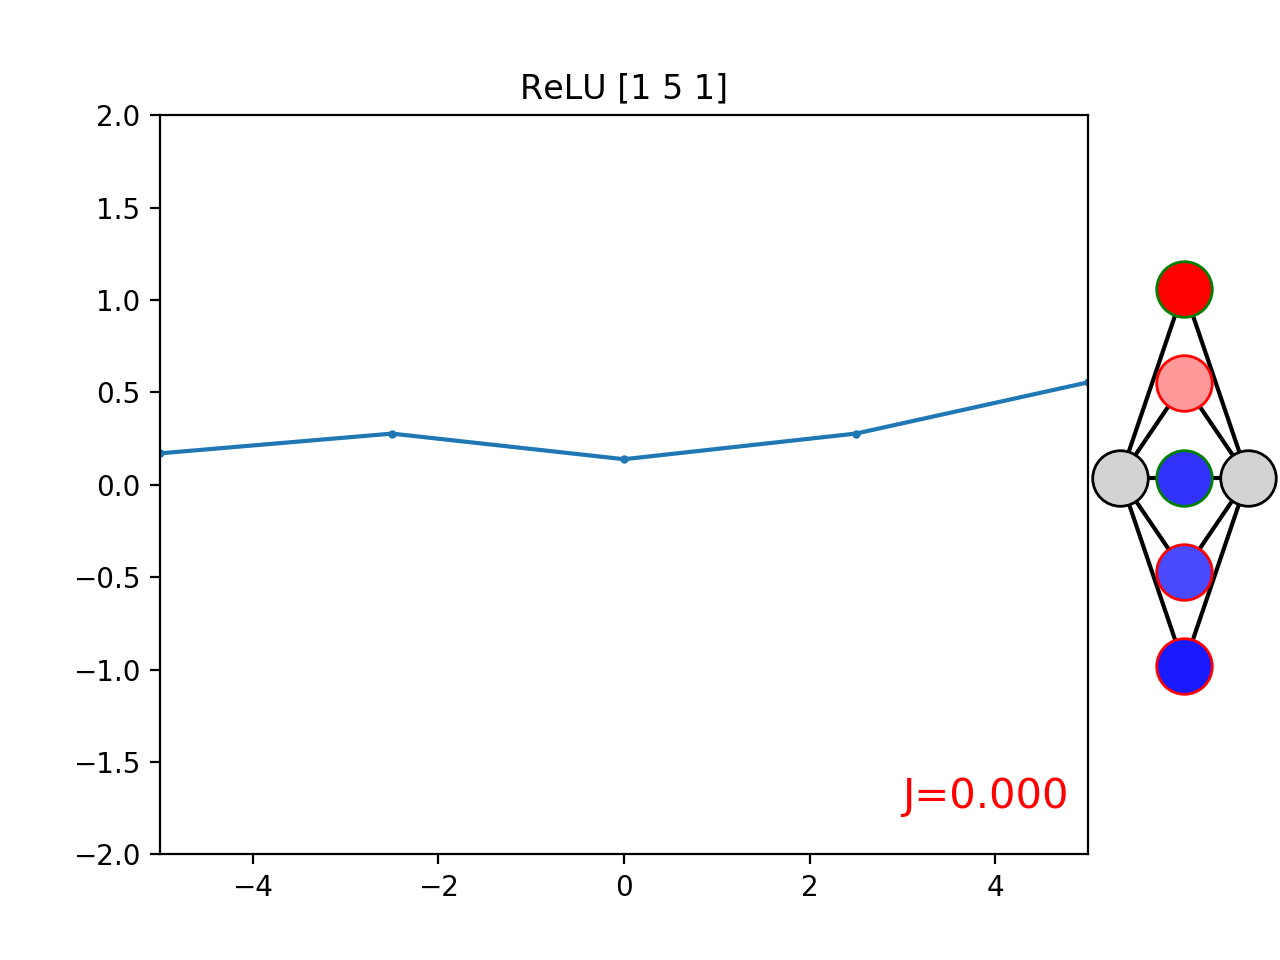

Text(value='', layout=Layout(width='50pt'))

In [7]:
%matplotlib notebook
xdata=[]
ydata=[]
handles=[]
xr = np.linspace(-5,5,3)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-5,5)
ax.set_ylim(-2,2)
plt.subplots_adjust(right=.85)

ax1=plt.axes([0.825, 0.11, .2, .785])
ax1.axis('off')

txt=None
line=None
            
cid = fig.canvas.mpl_connect('button_press_event', onclick)

text = widgets.Text(layout=widgets.Layout(width='50pt'))
display(text)
text.on_submit(nn)

In [8]:
fig.canvas.mpl_disconnect(cid)